In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [14]:
train_img_directory = 'data/train'

In [3]:
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

GPU is available


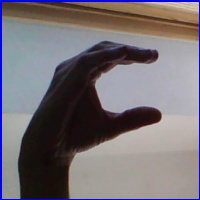

Image format is JPEG
Image size (horizontal and vertical size in pixels) is (200, 200)
Image mode is RGB


In [4]:
from PIL import Image
image = Image.open('data/train/C/C2.jpg')
display(image)
print(f'Image format is {image.format}')
print(f'Image size (horizontal and vertical size in pixels) is {image.size}')
print(f'Image mode is {image.mode}')

The Mode of the image is RGB which has 3 x 8-bit pixels and uses true color. 8-bit pixel has a range of 0-255 

## Checking if all the images are of same size, mode and format

In [5]:
no_issue = True
for idx, alphabet in enumerate(sorted(list(Path('data/train/').iterdir()))):
    label = alphabet.name
    images_list = list(alphabet.glob('*'))
    for image_path in images_list:
        image = Image.open(image_path)
        if image.format != 'JPEG' or image.size != (200, 200) or image.mode != 'RGB':
            print(image_path)
            print(f'Image format is {image.format}')
            print(f'Image size (horizontal and vertical size in pixels) is {image.size}')
            print(f'Image mode is {image.mode}')
            no_issue = False
if no_issue:
    print('All images are of same size, mode and format')

All images are of same size, mode and format


### Resizing (Work later on if needed)

Enlarged Image size (horizontal and vertical size in pixels) is (500, 500)
Shrinked Image size (horizontal and vertical size in pixels) is (40, 40)


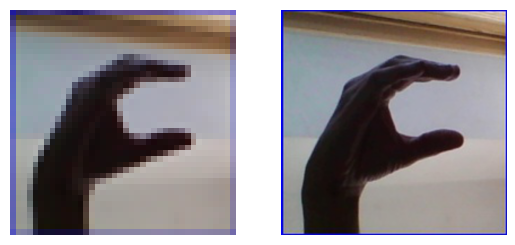

In [5]:
image = Image.open('data/train/C/C2.jpg')
enlarged_image = image.resize((500, 500))
shrinked_image = image.resize((40, 40))
print(f'Enlarged Image size (horizontal and vertical size in pixels) is {enlarged_image.size}')
print(f'Shrinked Image size (horizontal and vertical size in pixels) is {shrinked_image.size}')
for idx, img in enumerate([shrinked_image, enlarged_image]):
    plt.subplot(1, 2, idx+1)
    plt.title('')
    plt.axis('off')
    plt.imshow(img)

## Converting one image to array and analyzing pixel intensities

In [6]:
img = plt.imread('data/train/C/C2.jpg')
print(f'{img.shape}')
print(f'The total number of pixels in the image array is {img.size}')

(200, 200, 3)
The total number of pixels in the image array is 120000


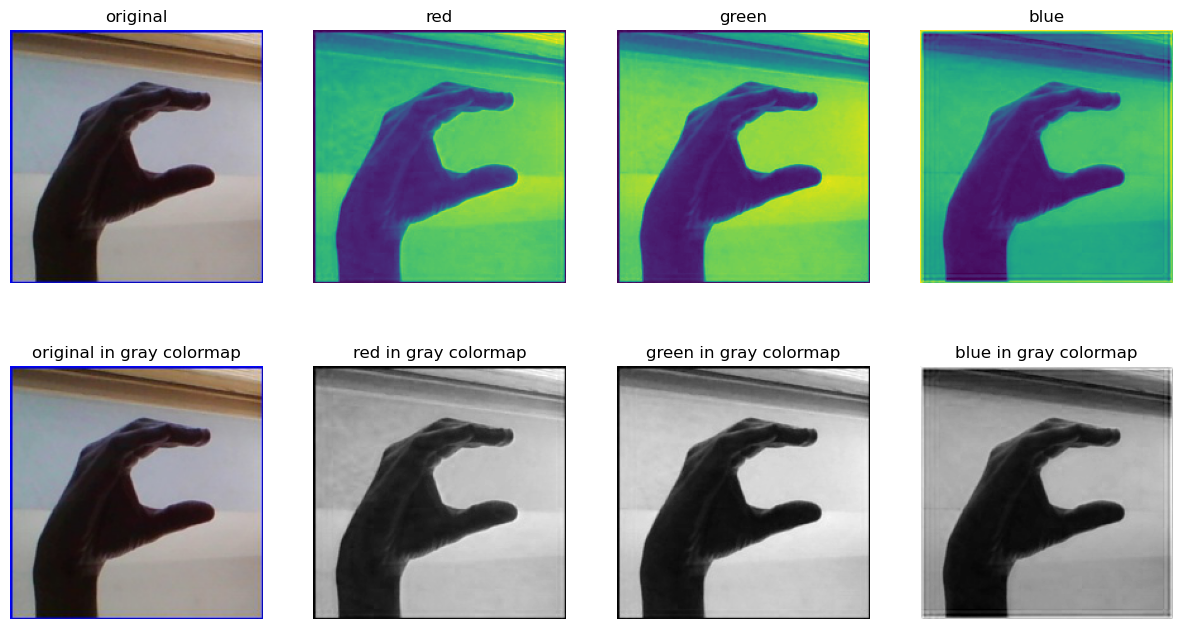

In [7]:
plt.figure(figsize=(15, 8))
for idx, (image, label) in enumerate([
                                    (img, 'original'), 
                                    (img[:, :, 0], 'red'), 
                                    (img[:, :, 1], 'green'), 
                                    (img[:, :, 2], 'blue')
                                    ]):
    plt.subplot(2, 4, idx+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    
for idx, (image, label) in enumerate([
                                    (img, 'original in gray colormap'), 
                                    (img[:, :, 0], 'red in gray colormap'), 
                                    (img[:, :, 1], 'green in gray colormap'), 
                                    (img[:, :, 2], 'blue in gray colormap')
                                    ]):
    plt.subplot(2, 4, idx+5)
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.show()

Displaying the 256 different intensities of the original, red color channel, green color channel and blue color channel

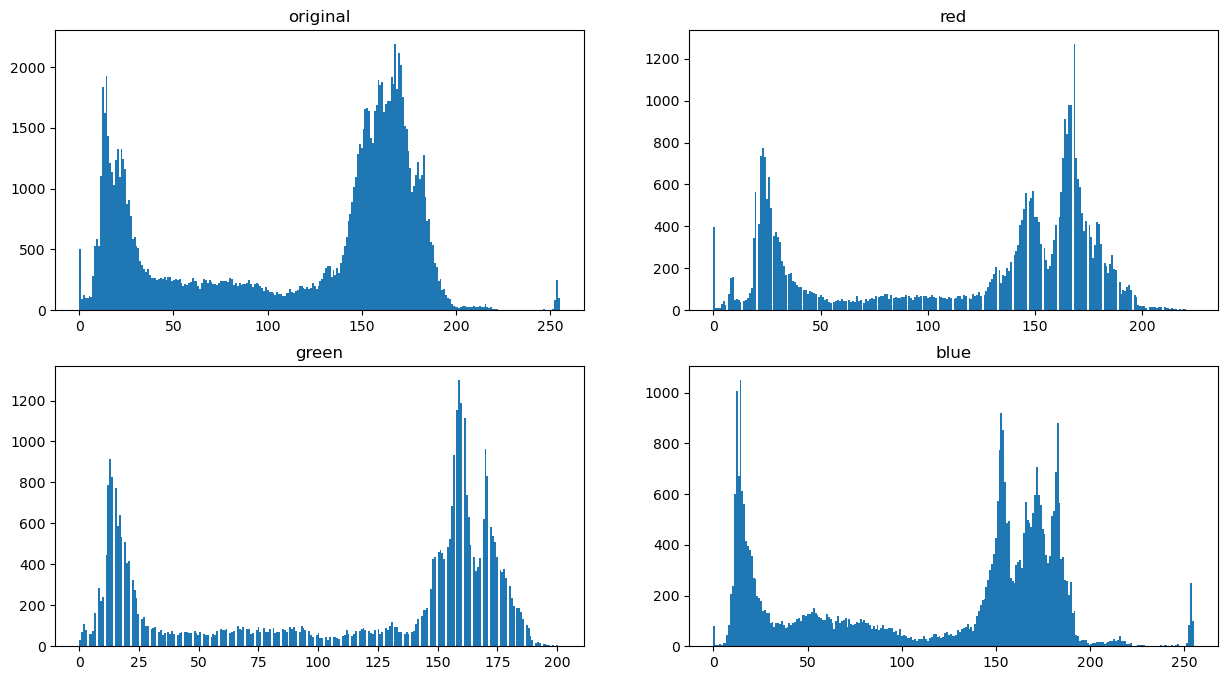

In [8]:
plt.figure(figsize=(15, 8))
for idx, (image, label) in enumerate([
                                    (img, 'original'), 
                                    (img[:, :, 0], 'red'), 
                                    (img[:, :, 1], 'green'), 
                                    (img[:, :, 2], 'blue')
                                    ]):
    plt.subplot(2, 2, idx+1)
    plt.title(label)
    plt.hist(image.ravel(), bins=256)
plt.show()

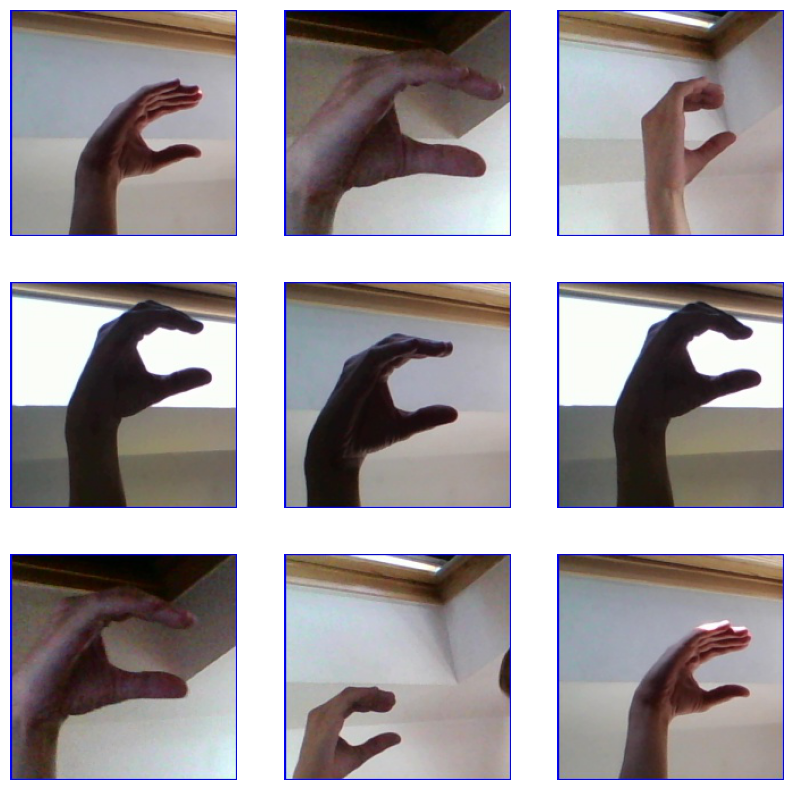

In [9]:
plt.figure(figsize=(10, 10))
images = [plt.imread(os.path.join('data/train/C', img_path)) for img_path in os.listdir('data/train/C')[:9]]
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.axis("off")